In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [86]:
df = pd.read_csv("asset/canada_per_capita_income.csv")
df.rename(columns = {'per capita income (US$)' : 'price'}, inplace = True)
df.head(5)

,year,price
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


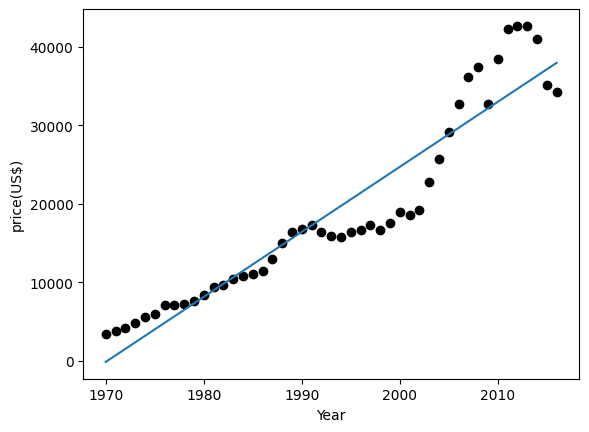

In [87]:
slope, intercept, r, p, std_err = stats.linregress(df.year, df.price)

def mapFun(x):
    return slope * x + intercept

mymodel = list(map(mapFun, df.year))

%matplotlib inline
plt.xlabel("Year")
plt.ylabel("price(US$)")
plt.plot(df.year, mymodel)
plt.scatter(df.year, df.price, color='black')

In [88]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']], df.price)

LinearRegression()

In [89]:
reg.predict([[2050]])

C:\Users\Saqib Javed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66142.6463511])

In [90]:
reg.coef_

array([828.46507522])

In [91]:
reg.intercept_

-1632210.7578554575

In [92]:
828.46507522 * 2050 -1632210.7578554575

66142.64634554251

In [93]:
df2 = pd.read_csv("asset/random.csv")
df2.head(5)

,year
0,2017
1,2020
2,2023
3,2026
4,2029


In [94]:
p = reg.predict(df2)

In [95]:
df2["price"] = p

In [96]:
df2.to_csv("asset/prediction.csv", index=False)

In [97]:
df3 = pd.read_csv("asset/prediction.csv")
df3.head(5)

,year,price
0,2017,38803.298869
1,2020,41288.694094
2,2023,43774.089320
3,2026,46259.484546
4,2029,48744.879771


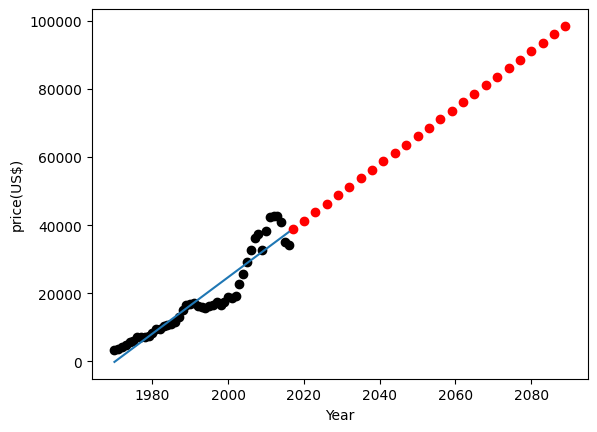

In [98]:
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("price(US$)")
plt.plot(df.year, mymodel)
plt.scatter(df.year, df.price, color='black')
plt.scatter(df3.year, df3.price, color='red')